Building prefix dict from the default dictionary ...
Loading model from cache F:\TEMP\jieba.cache
Dumping model to file cache F:\TEMP\jieba.cache
Loading model cost 1.432 seconds.
Prefix dict has been built successfully.


过滤后的词:
['新华社', '旧金山', '时间', '国家', '主席', '习近平', '美国', '旧金山', '斐洛', '庄园', '美国', '总统', '拜登', '举行', '会晤', '国', '事关', '中美关系', '战略性', '全局性', '方向性', '问题', '事关', '世界', '和平', '发展', '问题', '深入', '交换', '意见', '习近平', '指出', '经历', '未有', '大变局', '中美', '选择', '合作', '携手', '应对', '全球性', '挑战', '促进', '世界', '抱持', '思维', '挑动', '阵营', '对立', '让', '世界', '走向', '动荡', '分裂', '选择', '代表', '方向', '决定', '人类', '前途', '地球', '作为', '世界', '双边关系', '中美关系', '要', '放在', '背景', '思考', '谋划', '中美', '打交道', '不行', '想', '改变', '对方', '冲突', '对抗', '后果', '不能', '承受', '大国', '竞争', '解决不了', '中美', '两国', '世界', '面临', '问题', '地球', '容得', '中美', '两国', '中美', '机遇', '习近平', '阐释', '中国式', '现代化', '本质特征', '内涵', '意义', '中国', '战略', '意图', '习近平', '指出', '中国', '发展', '逻辑', '规律', '中国', '中国式', '现代化', '全面', '推进', '中华民族', '中国', '走', '殖民', '掠夺', '老路', '走', '歪路', '搞', '输出', '国家', '搞', '对抗', '中国', '没有', '超越', '取代', '美国', '规划', '美国', '打压', '遏制', '中国', '打算', '习近平', '指出', '和平共处', '合作', '赢', '是从', '中美关系', '历程', '经验', '历史', '大国', '冲突', '带来', '启示', '应该', '中美', '方向', '双方', '坚持', '和平共处', '合作',

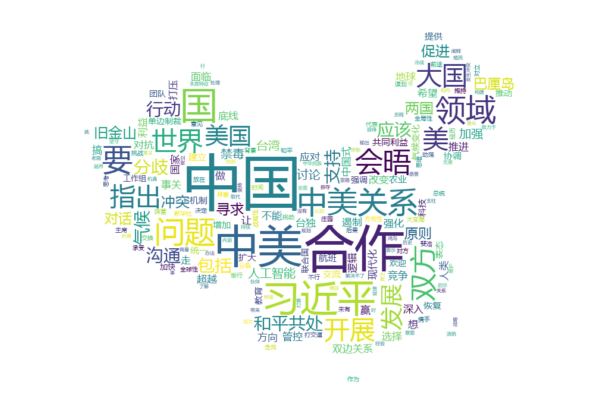

In [1]:
# 导入所需的库
import jieba.posseg as pseg
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import jieba
import matplotlib.pyplot as plt
from PIL import Image               #python image图片操作库
import numpy as np   
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 读取文本数据，假设文本数据保存在文件中
with open('Chinese _dataset.txt', 'r', encoding='utf-8') as file:
    text_data = file.read()
mask=np.array(Image.open("1.jpg"))  
# 定义函数，用于去除中文标点符号
def remove_chinese_punctuation(text):
    # 定义中文标点符号的正则表达式
    chinese_punctuation_pattern = re.compile("[\u3000\u3001-\u3011\u2014\u2018\u2019\u201c\u201d\u2026\uff01-\uff0f\uff1a-\uff1f\uff3b-\uff40\uff5b-\uff5e\uffe5]+")
    # 使用正则表达式替换中文标点符号为空字符串
    result = chinese_punctuation_pattern.sub("", text)
    return result

# 使用jieba进行中文分词，同时过滤掉标点符号和中文标点符号
seg_list = jieba.lcut_for_search(remove_chinese_punctuation(text_data))

# 获取每个词的词性
word_pos_list = pseg.cut(remove_chinese_punctuation(text_data))

# 根据词性进行筛选，只保留名词和动词，
filtered_word_list = []
for word in word_pos_list:
    if (word.flag.startswith('n') or word.flag.startswith('v')):
        filtered_word_list.append(word.word)

# 设置停用词
stop_words = ['你', '我', '的', '了', '们','他','是','有']
ciyun_words = []

# 过滤后的词
for word in filtered_word_list:
    if word not in stop_words:
        ciyun_words.append(word)

# 输出过滤后的词
print("过滤后的词:")
print(ciyun_words)

# 使用Counter统计词频
word_count = Counter(ciyun_words)

# 获取词频名词和动词中最高的top10
top_words = word_count.most_common(10)

# 打印输出
print("动词和名词中词频出现top10为:")
for word, count in top_words:
    print(f"{word}: {count}")

# 使用WordCloud制作词云
wordcloud = WordCloud(font_path="msyh.ttf",
                      background_color="white",
                      width=1000, height=500,
                      max_font_size=100,mask=mask).generate_from_frequencies(word_count)

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
